> **Tip**: Welcome to the Investigate a Dataset project !
           Made By **Ahmad ELnassag**


# Project: Investigate a Dataset (Medical Appointment No Shows!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

    ●‘ScheduledDay’ tells us on
    what day the patient set up their
    appointment.

    ● ‘Neighborhood’ indicates the
    location of the hospital.

    ● ‘Scholarship’ indicates
    whether or not the patient is
    enrolled in Brasilian welfare
    program Bolsa Família.

    ● Be careful about the encoding
    of the last column: it says ‘No’ if
    the patient showed up to their
    appointment, and ‘Yes’ if they
    did not show up.

###### What factors are important for us ?
* to know in order to
predict if a patient will
show up for their
scheduled
appointment?

**Dataset URL**
[Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments)



In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0;

  Using cached pandas-0.25.0-cp35-cp35m-win_amd64.whl (8.8 MB)


DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.


In [2]:
#import statements for all of the packages that we plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, we will load the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
data=pd.read_csv('KaggleV2-May-2016.csv')
data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Shape of Data
data.shape

(110527, 14)

 We have `110527` medical appointments and their `14` associated factors or Feature


In [5]:
#check for duplicated
data.duplicated().sum()


0

There is No duplicated Values 

In [6]:
# check for Null or Missing values
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is No Null Values in Dataset

In [7]:
#check for the unique Patient
data['PatientId'].nunique()

62299

i have only `62299` patient

In [8]:
#check for the duplicated Patient
data['PatientId'].duplicated().sum()

48228

i have `48228` patient have more than one show

In [9]:
# the number of the unique values for each column
column = list(data.columns.values)
for x in column:
    unique = data[x].nunique()    
    print( "Number of unique values in {} is :".format(x) ,unique)

Number of unique values in PatientId is : 62299
Number of unique values in AppointmentID is : 110527
Number of unique values in Gender is : 2
Number of unique values in ScheduledDay is : 103549
Number of unique values in AppointmentDay is : 27
Number of unique values in Age is : 104
Number of unique values in Neighbourhood is : 81
Number of unique values in Scholarship is : 2
Number of unique values in Hipertension is : 2
Number of unique values in Diabetes is : 2
Number of unique values in Alcoholism is : 2
Number of unique values in Handcap is : 5
Number of unique values in SMS_received is : 2
Number of unique values in No-show is : 2


In [10]:
# what is the unique values for some columns 
column = list(data.columns.values)
for x in column:
    if x not in ['PatientId', 'AppointmentID','Age', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood']:
        unique_val = data[x].unique()    
        print( "Number of unique values in {} is :".format(x) ,unique_val)

Number of unique values in Gender is : ['F' 'M']
Number of unique values in Scholarship is : [0 1]
Number of unique values in Hipertension is : [1 0]
Number of unique values in Diabetes is : [0 1]
Number of unique values in Alcoholism is : [0 1]
Number of unique values in Handcap is : [0 1 2 3 4]
Number of unique values in SMS_received is : [0 1]
Number of unique values in No-show is : ['No' 'Yes']


### Data Cleaning
    After discussing the structure of the data and any problems that need to be
    cleaned, perform those cleaning steps in the second part of this section.


In [11]:
# Some stastic information
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
# PatientId should be int
data.PatientId = data.PatientId.astype('int64')
data.PatientId.dtypes

dtype('int64')

In [13]:
# Age looks weird
len(data[data["Age"] == 0]),len(data[data["Age"] < 0])

(3539, 1)

In [14]:
# find patient whoes age -1
patient_wierd = data.query("Age ==-1")
patient_wierd

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
# drop this patient and remain Age = 0 as a kids
data.drop(index=99832,inplace=True)

now we drop this invalid row

In [16]:
# drop patients with duplicated Id and No-show
data.drop_duplicates(['PatientId','No-show'],inplace=True)
data.shape

(71816, 14)

 We have `71816` medical appointments after drop_duplicates


In [17]:
# Remove UNnecessary factors
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [18]:
UNnecessary = ['PatientId','AppointmentID','ScheduledDay','AppointmentDay']
data.drop(UNnecessary,axis=1,inplace=True)
data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: we've trimmed and cleaned the data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.

### General View

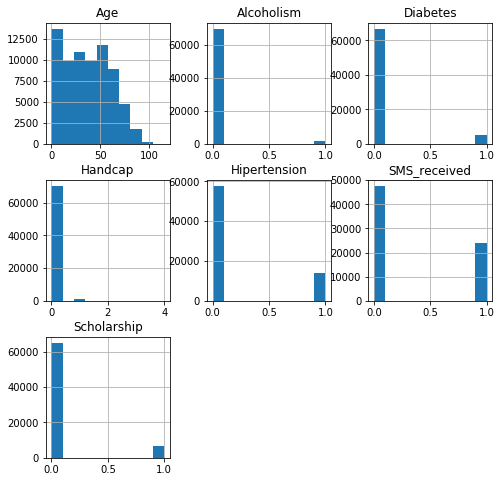

In [19]:
# show hist digram for All dataset
data.hist(figsize=(8,8));

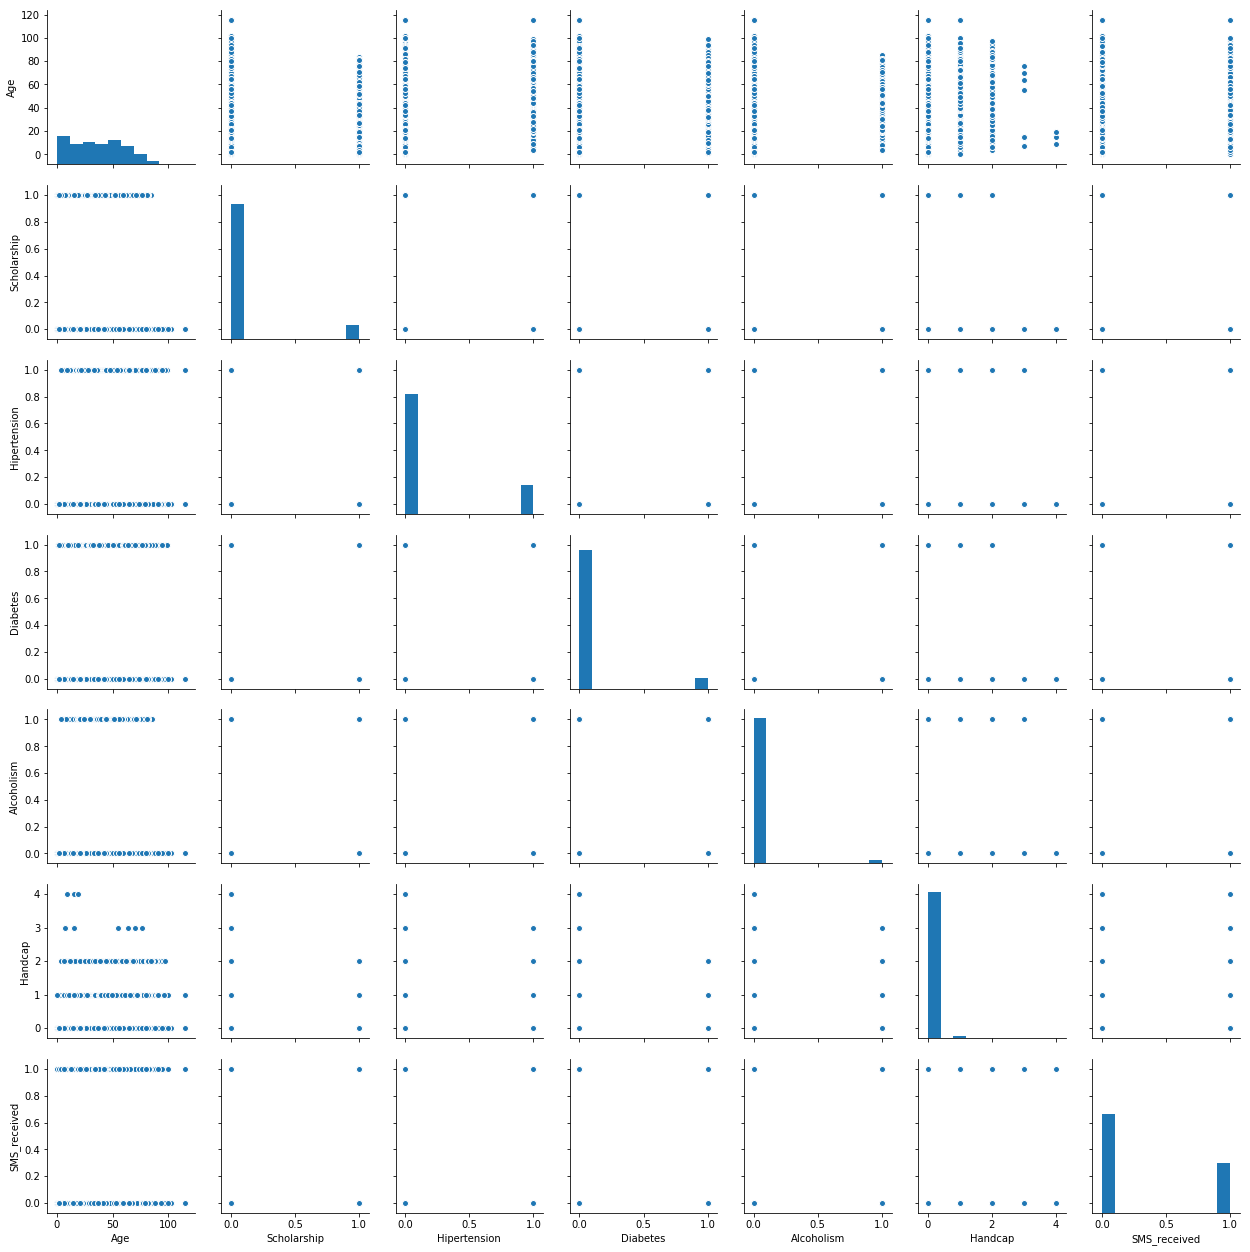

In [20]:
#Draw pairplot kind scatter
sns.pairplot(data, kind="scatter")
plt.show()

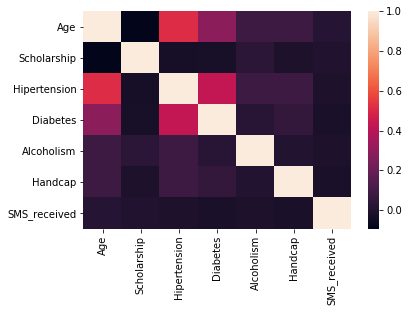

In [21]:
# Generating the correlation heatmap to compare the correlation between features
correlation = data.corr()
sns.heatmap(correlation);


there's no need to remove any feature


### Research question-1 ?
**What are the important factors for us to know if the patient will come on time?**

In [22]:
#values count of All attendance
data["No-show"].value_counts()

No     54153
Yes    17663
Name: No-show, dtype: int64

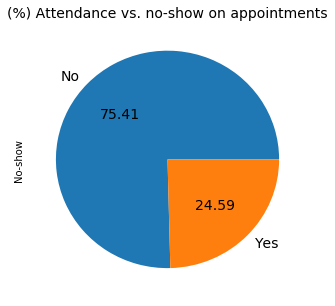

In [23]:
#represet the attendance percentage with pie chart
plt.title ("(%) Attendance vs. no-show on appointments", fontsize=14)
data["No-show"].value_counts().plot(figsize=(5,5),kind="pie",autopct='%.2f', textprops={'fontsize': 14});

In [24]:
# check the value count of all attendance
data["Gender"].value_counts()

F    46466
M    25350
Name: Gender, dtype: int64

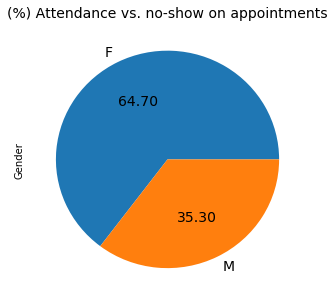

In [25]:
#represet the attendance percentage with pie chart
plt.title ("(%) Attendance vs. no-show on appointments", fontsize=14)
data["Gender"].value_counts().plot(figsize=(5,5),kind="pie",autopct='%.2f', textprops={'fontsize': 14});

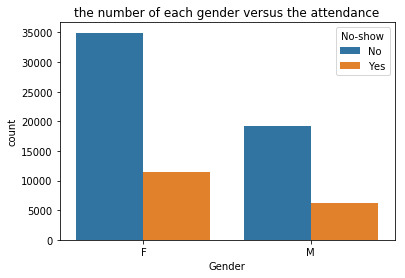

In [26]:
#show the number of each gender versus the attendance by bar chart¶
attend = data['No-show']
show = sns.countplot(x=data.Gender, hue=attend)
show.set_title("the number of each gender versus the attendance")
x_ticks_labels=['F', 'M']
plt.show();

We notice that the number of Female patients is higher in both showing and not-showing, compared to the male patients, which is understandable , due to higher number of appointments for the females

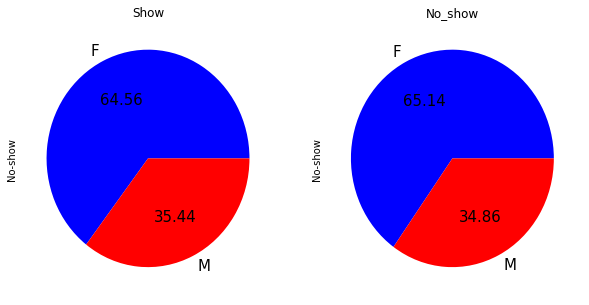

In [27]:
#No-show percentage for female patients versus male patients
fig, axs = plt.subplots(1,2)
data[data["No-show"]=="No"].groupby("Gender")["No-show"].count().plot(figsize=(10,5),kind="pie",autopct='%.2f', ax=axs[0],colors=['blue','red'],title="Show",textprops={'fontsize': 15});
data[data["No-show"]=="Yes"].groupby("Gender")["No-show"].count().plot(figsize=(10,5),kind="pie",autopct='%.2f',ax=axs[1],colors=['blue','red'],title="No_show", textprops={'fontsize': 15});

> **Tip**: 64.56% of patients attending for their appointments are female, while males represent 35.44% of the total patients. The non-attendance rate was high, with 65.14% for females, compared to 34.86 for males, due to the high number of appointments booked by females.

In [28]:
# check the count of appointments for different ages
data["Age"].value_counts()

0      2401
1      1614
2      1189
3      1067
5      1050
       ... 
98        5
100       3
115       3
102       2
99        1
Name: Age, Length: 103, dtype: int64

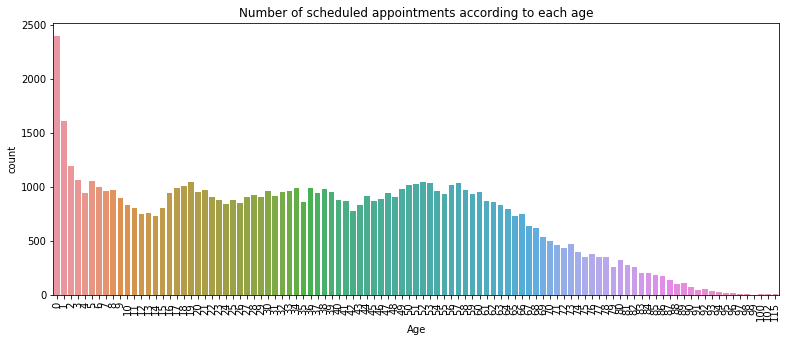

In [29]:
# Number of patients at each age
plt.figure(figsize=(13,5))
plt.xticks(rotation=90)
xP = sns.countplot(x=data.Age)
xP.set_title("Number of scheduled appointments according to each age")
plt.show()

we can see that the most of appointmenst in age (0 and 1) and also alot in range (49 to 59)



In [30]:
# check the value count of all SMS_received
data["SMS_received"].value_counts()

0    47717
1    24099
Name: SMS_received, dtype: int64

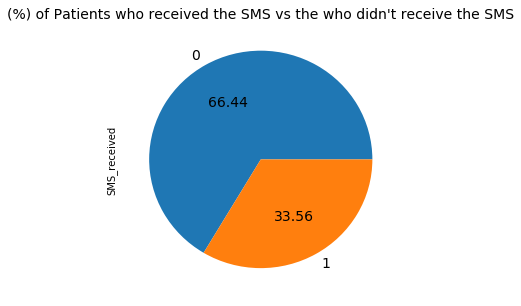

In [31]:
#represet the SMS_received percentage with pie chart
plt.title ("(%) of Patients who received the SMS vs the who didn't receive the SMS", fontsize=14)
data["SMS_received"].value_counts().plot(figsize=(5,5),kind="pie",autopct='%.2f', textprops={'fontsize': 14});

In [32]:
Show = attend == 'No'
NO_show = attend == 'Yes'

Text(0,0.5,'MeanAge')

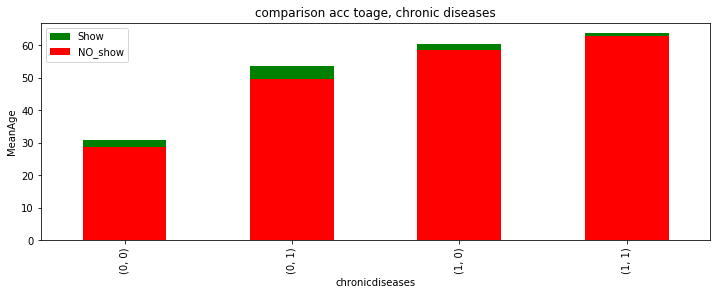

In [33]:
#doesageand chornic diseases are affected on the attendance rat together
plt.figure(figsize=[12,4]);
data[Show].groupby(['Hipertension','Diabetes']).mean()['Age'].plot(kind='bar',color='green',label='Show')

data[NO_show].groupby(['Hipertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='NO_show')

plt.legend()
plt.title('comparison acc toage, chronic diseases')
plt.xlabel('chronicdiseases')
plt.ylabel('MeanAge')

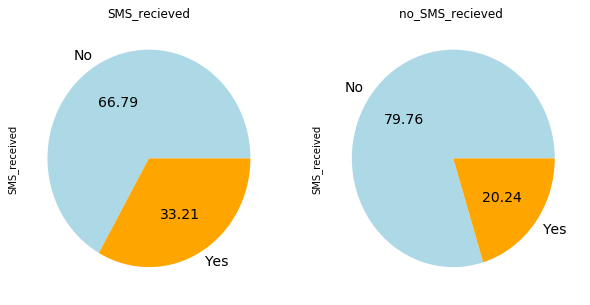

In [34]:
# the precentage of the patients that recieved and show or no show up vs they don't
fig, axs = plt.subplots(1,2)
data[data["SMS_received"]==1].groupby("No-show")["SMS_received"].count().plot(figsize=(10,5),kind="pie",autopct='%.2f', ax=axs[0],colors=['lightblue','orange'],title="SMS_recieved",textprops={'fontsize': 14});
data[data["SMS_received"]==0].groupby("No-show")["SMS_received"].count().plot(figsize=(10,5),kind="pie",autopct='%.2f',ax=axs[1],colors=['lightblue','orange'],title="no_SMS_recieved ", textprops={'fontsize': 14});

We can see that the percentage of patients who did not receive an SMS and show the appointment is greater than what they did not receive by 12.97% because the number of patients who did not receive was greater as we saw before

But I can see that the percentage of patients showing though they did not receive SMS is closer than the percentage that patients received despite the big difference between their accounts, so I can imagine that receiving SMS will affect attendance significantly

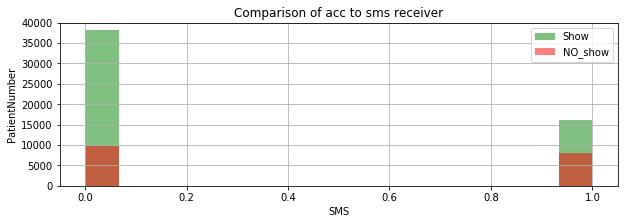

In [35]:
#Does receving SMS  affect attendance ?
def attend (data,col,attend, absent):
    plt.figure(figsize=[10,3]);
    data[col][Show].hist(alpha =0.5,bins=15, color='green',label='Show')
    data[col][NO_show].hist(alpha =0.5, bins=15 ,color='red', label='NO_show')
    plt.legend();
    plt.title('Comparison of acc to sms receiver')
    plt.xlabel('SMS')
    plt.ylabel('PatientNumber');
attend(data,'SMS_received', Show, NO_show)

The number of showing patients without receiving sms is greater than showing patient with receiving sms, which means we need to revisit our sms campaign

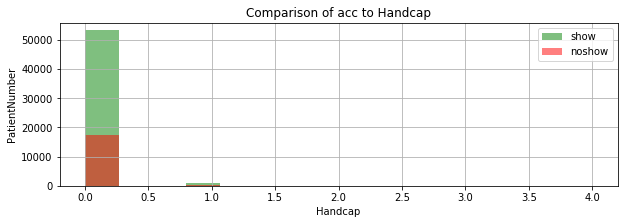

In [36]:
#Does Handcap  affect attendance ?
def attend (data,col,attend, absent):
    plt.figure(figsize=[10,3]);
    data[col][Show].hist(alpha =0.5,bins=15, color='green',label='show')
    data[col][NO_show].hist(alpha =0.5, bins=15 ,color='red', label='noshow')
    plt.legend();
    plt.title('Comparison of acc to Handcap')
    plt.xlabel('Handcap')
    plt.ylabel('PatientNumber');
attend(data,'Handcap', Show, NO_show)

In [37]:
# the count of each degree of Handicap
x=data['Handcap'].value_counts()
x

0    70511
1     1178
2      116
3        8
4        3
Name: Handcap, dtype: int64

we can see that the most of appointments are book from the No disability parients



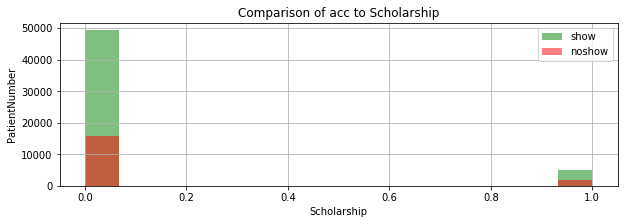

In [38]:
#Does Scholarship  affect attendance ?
def attend (data,col,attend, absent):
    plt.figure(figsize=[10,3]);
    data[col][Show].hist(alpha =0.5,bins=15, color='green',label='show')
    data[col][NO_show].hist(alpha =0.5, bins=15 ,color='red', label='noshow')
    plt.legend();
    plt.title('Comparison of acc to Scholarship')
    plt.xlabel('Scholarship')
    plt.ylabel('PatientNumber');
attend(data,'Scholarship', Show, NO_show)

<a id='conclusions'></a>
## Conclusions
The total number of patients who attended is more than those who did not attend, and the number of patients who did not attend was 20.19%

Females tend to make appointments more than males, but males are more committed to attending

The younger the patient, the more appointments are made, although we note that patients between 50 and 80 years of age are more committed to attending appointments

Patients who do not have a scholarship are more committed to attending appointments than patients who have a scholarship
Patients with 'high blood pressure' are more obligated to attend

## Limitations
There are a few wrong data need to be explated, negative age values ​​and wrong scheduling dates

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0